# Compare thermo library entries
This code is used to compare thermodynamic properties of entries from a single library to RMG built-in thermo data

### Necessary package

In [1]:
import logging
import os

from rmgpy import settings
from rmgpy.data.rmg import RMGDatabase
from rmgpy.species import Species

from toolbox.thermolib import read_thermo_lib_by_path, draw_free_energies
                              
%matplotlib inline
try:
    %config InlineBackend.figure_format = 'retina'
except:
    pass

%load_ext autoreload
%autoreload 2

logger = logging.getLogger()
logger.setLevel(logging.INFO)

###  [OPTIONAL] Assign a log file to record all the changes

In [2]:
fh = logging.FileHandler('thermo_lib_tools.log', mode="a+")
fh.setLevel(logging.INFO)
fh.setFormatter(logging.Formatter('%(asctime)s - %(levelname)s: %(message)s'))
logger.addHandler(fh)

### [INPUT] Assign the built-in library to be compared with

In [3]:
thermo_libs = ['primaryThermoLibrary', 
              'Klippenstein_Glarborg2016',
              'thermo_DFT_CCSDTF12_BAC',
              'BurkeH2O2',
              'DFT_QCI_thermo',
              'Narayanaswamy',
              'BurcatNS',
              'CHO']

### Load a RMG database instance

In [4]:
database = RMGDatabase()
database.load(
    path = settings['database.directory'],
    thermo_libraries = thermo_libs,
    kinetics_families = "default",
    reaction_libraries = [],
    kinetics_depositories = ['training'],
)

thermo_database = database.thermo

INFO:root:Loading thermodynamics library from primaryThermoLibrary.py in /Users/xiaorui/Apps/RMG-database/input/thermo/libraries...
INFO:root:Loading thermodynamics library from Klippenstein_Glarborg2016.py in /Users/xiaorui/Apps/RMG-database/input/thermo/libraries...
INFO:root:Loading thermodynamics library from thermo_DFT_CCSDTF12_BAC.py in /Users/xiaorui/Apps/RMG-database/input/thermo/libraries...
INFO:root:Loading thermodynamics library from BurkeH2O2.py in /Users/xiaorui/Apps/RMG-database/input/thermo/libraries...
INFO:root:Loading thermodynamics library from DFT_QCI_thermo.py in /Users/xiaorui/Apps/RMG-database/input/thermo/libraries...
INFO:root:Loading thermodynamics library from Narayanaswamy.py in /Users/xiaorui/Apps/RMG-database/input/thermo/libraries...
INFO:root:Loading thermodynamics library from BurcatNS.py in /Users/xiaorui/Apps/RMG-database/input/thermo/libraries...
INFO:root:Loading thermodynamics library from CHO.py in /Users/xiaorui/Apps/RMG-database/input/thermo/li

### Input
- `lib_path` (str): the full path to a RMG thermo library you want to compare
- `disp` (bool): Whether to display the species structure
- `compare_to_grp` (bool): whether compare to group 

In [5]:
lib_path = '../media/thermo library/compare_thermo_library_entries/BA.py'
disp = True
compare_to_grp = False

INFO:root:Loading thermodynamics library BA.py from ../media/thermo library/compare_thermo_library_entries ...


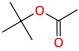

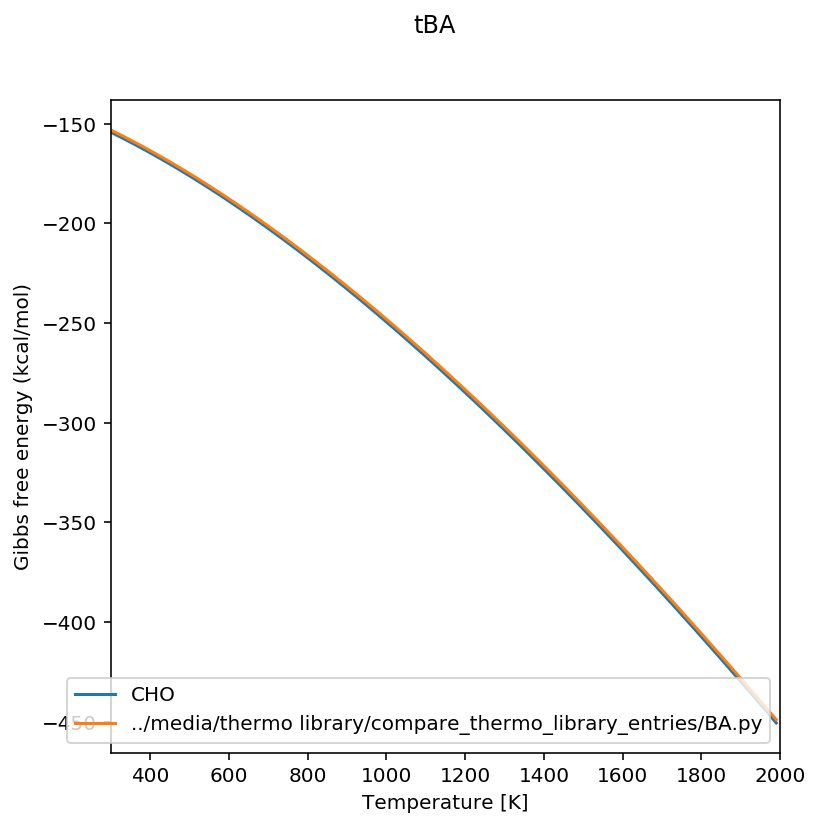

In [6]:
# Read the thermo library
read_thermo_lib_by_path(lib_path, thermo_database)
for label, entry in thermo_database.libraries[lib_path].entries.items():
    # Convert molecule instance to species instance
    spc = Species().from_smiles(entry.item.to_smiles())
    if compare_to_grp:
        data_list = [data[0] for data in thermo_database.get_all_thermo_data(spc)]
    else:
        data_list = [data[0] for data in thermo_database.get_all_thermo_data(spc) 
                      if "group" not in data[0].comment]
    
    # If only find the data from lib_path, then pass
    if len(data_list) != 1:
        # display the molecule
        if disp:
            display(entry.item)
            legends = [data.comment for data in data_list]
        if lib_path not in legends:
            data_list.append(entry.data)
            legends.append(lib_path)
        draw_free_energies(data_list, label=label, T_min=300, T_max=2000, size=6, legends=legends)